In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
!pip install nltk
!pip install wordcloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
!pip install chardet
import chardet
import string

In [4]:
with open("news[1].csv","rb") as data_file:
  encoding = chardet.detect(data_file.read())['encoding']
news_data = pd.read_csv("news[1].csv",encoding=encoding)

In [5]:
news_data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary‚Äôs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"‚Äî Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
news_data.shape

(6335, 4)

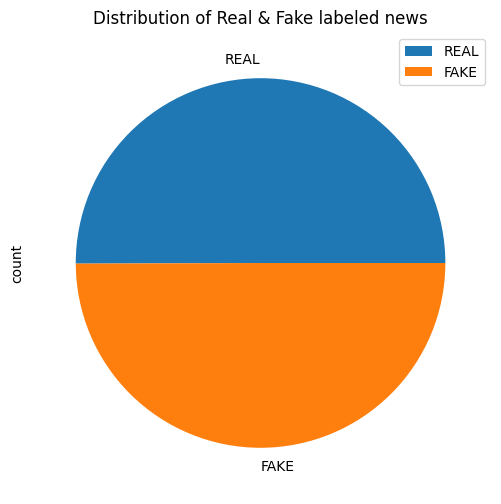

In [7]:
plt.figure(figsize=(8,6))
news_data['label'].value_counts().plot(kind='pie')
plt.title('Distribution of Real & Fake labeled news')
plt.legend()
plt.show()

**0 -> Fake**

**1 -> Real**

In [8]:
label = LabelEncoder()
news_data['label'] = label.fit_transform(news_data['label'])
news_data['new']= news_data['title']+str(' ')+news_data['text']
news_data.head()

,Unnamed: 0,title,text,label,new
0,8476,You Can Smell Hillary‚Äôs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,You Can Smell Hillary‚Äôs Fear Daniel Greenfie...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"‚Äî Kaydee King (@KaydeeKing) November 9, 2016...",0,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,The Battle of New York: Why This Primary Matte...


In [9]:
news_data.drop(columns=['Unnamed: 0','title','text'],inplace=True)

In [10]:
news_data.head()

,label,new
0,0,You Can Smell Hillary‚Äôs Fear Daniel Greenfie...
1,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,1,Kerry to go to Paris in gesture of sympathy U....
3,0,Bernie supporters on Twitter erupt in anger ag...
4,1,The Battle of New York: Why This Primary Matte...


In [11]:
class Preprocessing:
  def __init__(self,data):
    self.data = data
  def cleaning(self):
    stop = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    self.data= self.data.lower()
    self.data = word_tokenize(self.data)
    self.data = [i for i in self.data if i.isalpha()]
    self.data = [i for i in self.data if i not in string.punctuation]
    self.data = [i for i in self.data if i not in stop]
    self.data = [stemmer.stem(i) for i in self.data]
    self.data = " ".join(self.data)
    return self.data

In [12]:
def clean_apply(data):
  pre = Preprocessing(data)
  return pre.cleaning()

In [13]:
#pre = Preprocessing(news_data['new'][0])
news_data['clean_news']=news_data['new'].apply(clean_apply)

In [14]:
news_data.head()

,label,new,clean_news
0,0,You Can Smell Hillary‚Äôs Fear Daniel Greenfie...,smell fear daniel greenfield shillman journal ...
1,0,Watch The Exact Moment Paul Ryan Committed Pol...,watch exact moment paul ryan commit polit suic...
2,1,Kerry to go to Paris in gesture of sympathy U....,kerri go pari gestur sympathi secretari state ...
3,0,Bernie supporters on Twitter erupt in anger ag...,berni support twitter erupt anger dnc tri warn...
4,1,The Battle of New York: Why This Primary Matte...,battl new york primari matter primari day new ...


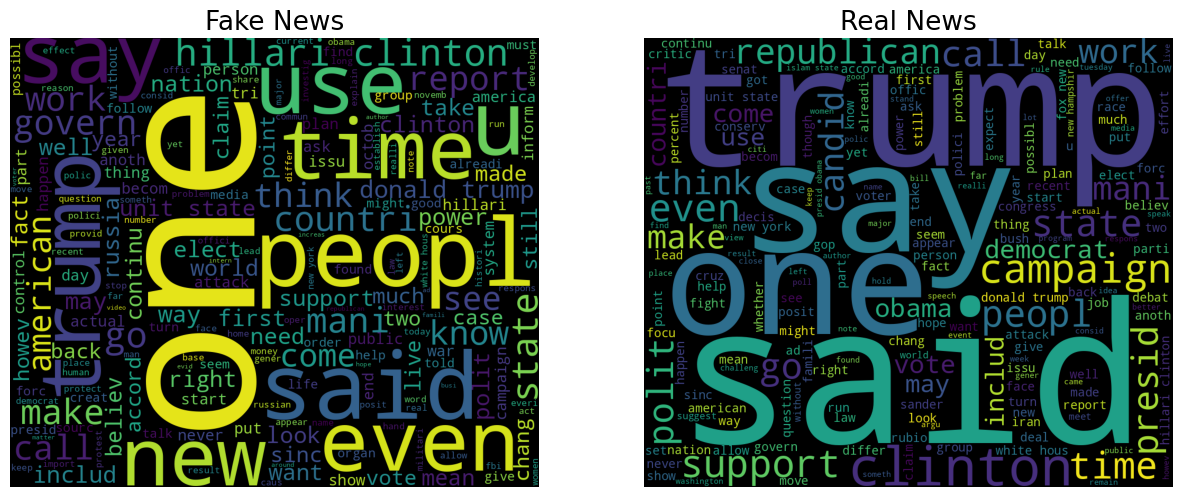

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
fake = ' '.join(list(news_data[news_data['label']==0]['clean_news']))
wordcloud_f = WordCloud(width =1000, height = 850,background_color='black').generate(fake)
plt.imshow(wordcloud_f)
plt.title('Fake News',fontdict=dict(fontsize=19))
plt.axis('off')

plt.subplot(1,2,2)
real = ' '.join(list(news_data[news_data['label']==1]['clean_news']))
wordcloud_r = WordCloud(height=850,width=1000,background_color='black').generate(real)
plt.imshow(wordcloud_r)
plt.title('Real News',fontdict=dict(fontsize=19))
plt.axis('off')
plt.show()

In [16]:
vec_tfidf = TfidfVectorizer(max_features=6100,ngram_range=(1,3))
x = vec_tfidf.fit_transform(news_data['clean_news']).toarray()
y = news_data['label'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5068, 6100), (1267, 6100), (5068,), (1267,))

In [18]:
mb,gn,bn,lr,pac,svc,rfc,gbc,etc = MultinomialNB(),GaussianNB(),BernoulliNB(),LogisticRegression(),PassiveAggressiveClassifier(max_iter=50),SVC(kernel='linear'),RandomForestClassifier(),GradientBoostingClassifier(),ExtraTreesClassifier()

In [19]:
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       603
           1       0.95      0.93      0.94       664

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [20]:
lin=LinearSVC()
lin.fit(x_train,y_train)
y_pred = lin.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       603
           1       0.95      0.93      0.94       664

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [21]:
pac.fit(x_train,y_train)
y_pred = pac.predict(x_test)

In [22]:
print(pac.score(x_train,y_train),'\n',pac.score(x_test,y_test))

1.0 
 0.936069455406472


In [23]:
models={
    'MultinomialNB':mb,
    'GaussianNB':gn,
    'BernoulliNB':bn,
    'LogisticRegression':lr,
    'PassiveAggressiveClassifier':pac,
    'SVC':svc,
    'RandomForestClassifier':rfc,
    'ExtraTreesClassifier':etc
}

In [24]:
m = ['mb','gb','bnb','lr','pac','svc','rfc','etc']

In [25]:
k=0
model_df=pd.DataFrame()
for i,j in models.items():
  j.fit(x_train,y_train)
  y_pred= j.predict(x_test)
  df = pd.DataFrame({
      'accurcy_score':[round((accuracy_score(y_test,y_pred)),3)],
      'precision_score':[round((precision_score(y_test,y_pred)),3)],
      'recall_score':[round((recall_score(y_test,y_pred)),3)],
      'f1_score':[round((f1_score(y_test,y_pred)),3)],
      'model_name':[i],
      'short':[m[k]]
  },index=[k])
  k+=1
  model_df = pd.concat([df,model_df],axis=0)

In [26]:
df = model_df.copy()

In [30]:
def highlight(s):
  max = s==s.max()
  return ['background-color: yellow' if i else "" for i in max]
model_df.style.apply(highlight)

,accurcy_score,precision_score,recall_score,f1_score,model_name,short
7,0.912000,0.916000,0.916000,0.916000,ExtraTreesClassifier,etc
6,0.906000,0.921000,0.898000,0.909000,RandomForestClassifier,rfc
5,0.941000,0.954000,0.932000,0.943000,SVC,svc
4,0.934000,0.939000,0.935000,0.937000,PassiveAggressiveClassifier,pac
3,0.919000,0.940000,0.904000,0.922000,LogisticRegression,lr
2,0.792000,0.860000,0.720000,0.784000,BernoulliNB,bnb
1,0.877000,0.890000,0.873000,0.881000,GaussianNB,gb
0,0.892000,0.909000,0.883000,0.895000,MultinomialNB,mb


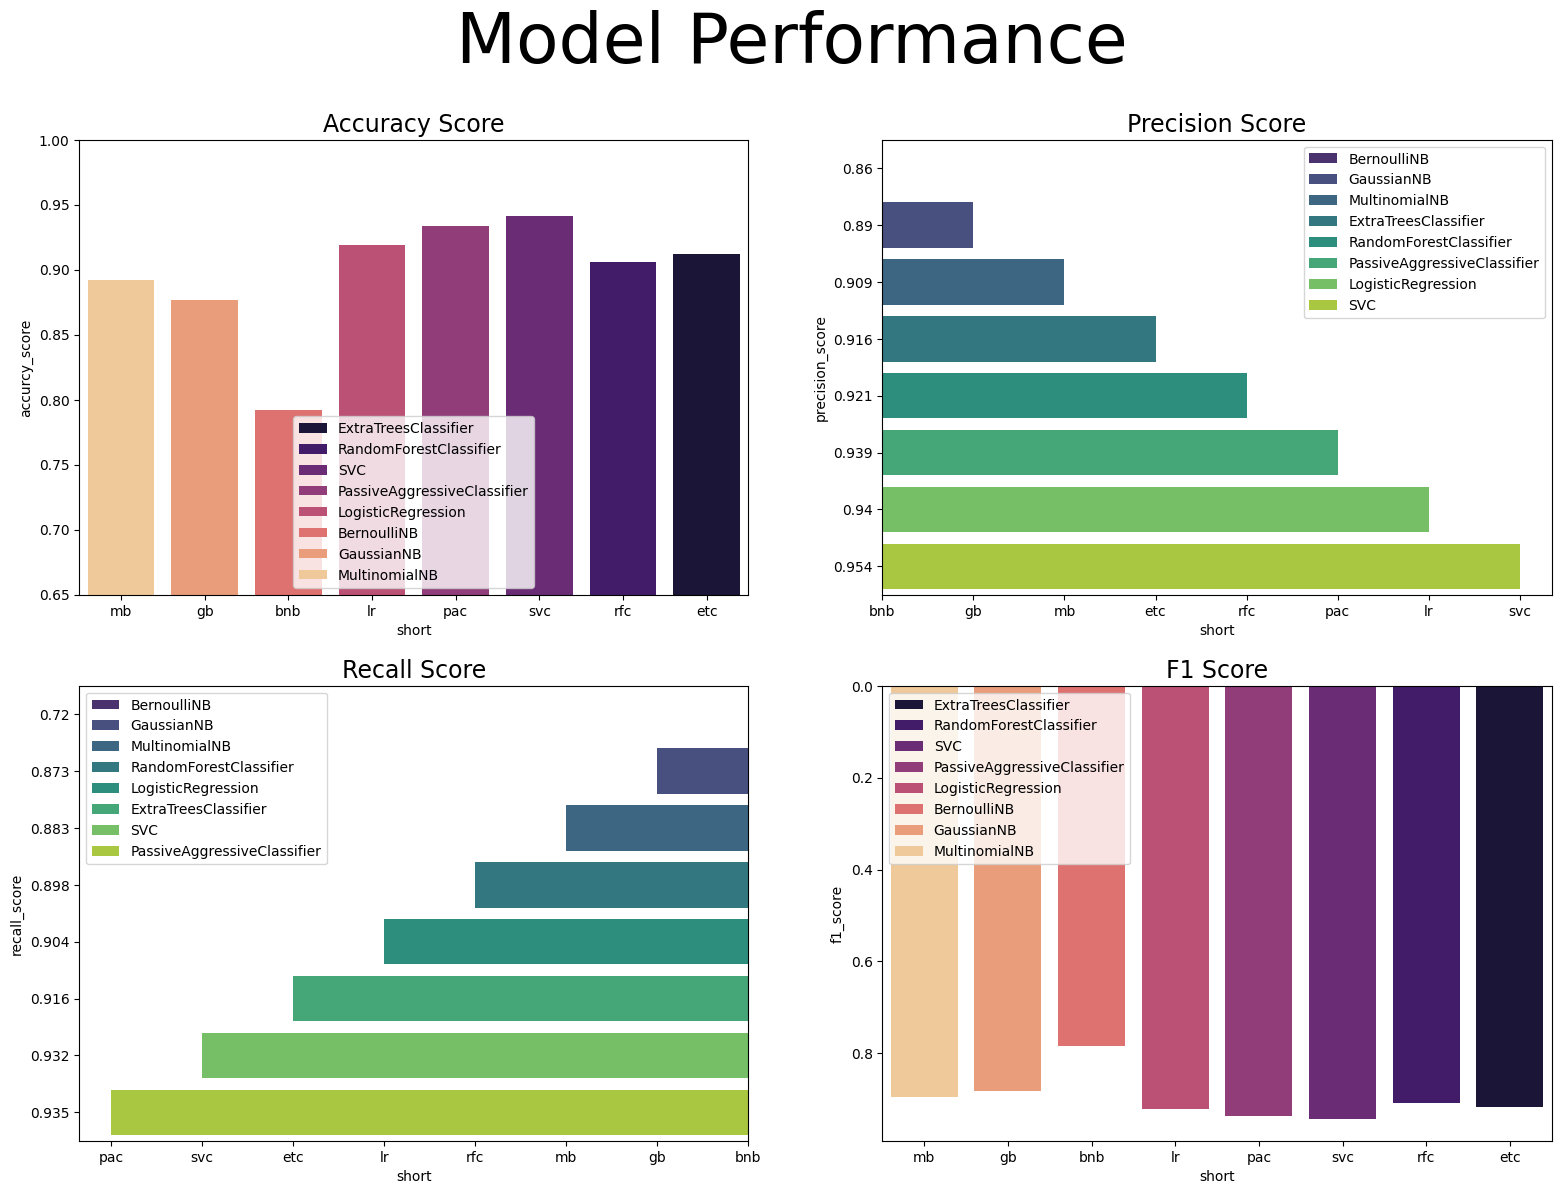

In [42]:
plt.figure(figsize=(19,13))
plt.suptitle('Model Performance',fontsize=50)
plt.subplot(2,2,1)
sns.barplot(y='accurcy_score',x='short',data=df,palette='magma',orient='v',hue='model_name')
plt.title('Accuracy Score',fontdict=dict(fontsize=17))
plt.legend(loc='lower center')
plt.gca().invert_xaxis()
plt.gca().set_ylim(0.65,1)

plt.subplot(2,2,2)
sns.barplot(y='precision_score',x='short',data=df,palette='viridis',orient='y',hue='model_name')
plt.title('Precision Score',fontdict=dict(fontsize=17))
plt.legend(loc='upper right')

plt.subplot(2,2,3)
sns.barplot(y='recall_score',x='short',data=df,palette='viridis',orient='h',hue='model_name')
plt.title('Recall Score',fontdict=dict(fontsize=17))
plt.legend(loc='upper left')
plt.gca().invert_xaxis()

plt.subplot(2,2,4)
sns.barplot(y='f1_score',x='short',data=df,palette='magma',orient='v',hue='model_name')
plt.title('F1 Score',fontdict=dict(fontsize=17))
plt.legend(loc='upper left')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

In [44]:
import pickle
pickle.dump(svc,open("./news_app.sav","wb"))
pickle.dump(vec_tfidf,open('./vectorizer.sav','wb'))